# Libraries

In [ ]:
# 📚 Basic Libraries
import pandas as pd
import numpy as np
import warnings
import os
import plotly.express as px
import zipfile
from google.colab import files

# 📊 Visualizations
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

# 🤖 Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

# ⚙️ Settings
pd.set_option('display.max_columns', None) # display all columns
warnings.filterwarnings('ignore') # ignore warnings

# 🔧 Basic functions
def snake_columns(data):
    """
    Standarize and returns snake_case columns
    """
    data.columns = [column.lower().replace(' ', '_') for column in data.columns]

#00 | Data Extraction

In [ ]:
os.listdir()

['.config', 'archive (9).zip', 'sample_data']

In [ ]:
data = pd.read_csv('archive (9).zip')

In [ ]:
df = data.copy() # Making security copy

# 01 | About Dataset

[Kaggle link](https://www.kaggle.com/datasets/sadiqshah/bike-sales-in-europe/data)  

**Columns:**
- `Date`: The date of the sale.
- `Day`: The day of the month when the sale occurred.
- `Month`: The month when the sale occurred.
- `Year`: The year when the sale occurred.
- `Customer_Age`: Age of the customer.
- `Age_Group`: Age group classification of the customer.
- `Customer_Gender`: Gender of the customer.
- `Country`: Country where the sale took place.
- `State`: State where the sale took place.
- `Product_Category`: Category of the product sold.
- `Sub_Category`: Sub-category of the product sold.
- `Product`: Specific product sold.
- `Order_Quantity`: Number of units ordered.
- `Unit_Cost`: Cost per unit of the product.
- `Unit_Price`: Selling price per unit of the product.
- `Profit`: Profit from the sale.
- `Cost`: Total cost of the sale.
- `Revenue`: Total revenue from the sale.

**Problem Statement**

**Business Analyst Case:** A bike shop has been gathering data from 2011-2016 and now wants to gain insights and understand historical performance to improve the business. The objective is to use this data to predict future demand and profits, which are key for making informed business decisions.


# 02 | Data Exploration

In [ ]:
rows, columns = df.shape

In [ ]:
print(f'Number of Rows: {rows}')
print(f'Number of Columns: {columns}')

Number of Rows: 113036
Number of Columns: 18


In [ ]:
df.dtypes # 50/50 distribution numerical-categoricals

,0
Date,object
Day,int64
Month,object
Year,int64
Customer_Age,int64
Age_Group,object
Customer_Gender,object
Country,object
State,object
Product_Category,object


# 03 | Data Cleaning

In [ ]:
# Cleaning columns in snake_format:
snake_columns(df)

## Duplicates

In [ ]:
# Checking duplicates:
df.duplicated().sum()

1000

In [ ]:
# Dropping duplicates:
df = df.drop_duplicates()

In [ ]:
# Checking we now have 0 duplicates:
df.duplicated().sum()

0

## Null Values

In [ ]:
df.isna().sum() # We have no null values

,0
date,0
day,0
month,0
year,0
customer_age,0
age_group,0
customer_gender,0
country,0
state,0
product_category,0


In [ ]:
df.eq(" ").sum() # No empty values

,0
date,0
day,0
month,0
year,0
customer_age,0
age_group,0
customer_gender,0
country,0
state,0
product_category,0


## Dates cleaning

In [ ]:
# Mapping month names to numbers:
month_mapping = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

In [ ]:
# Creating a new column [month_number]:
df['month_number'] = df['month'].map(month_mapping)

In [ ]:
df.sample()

,date,day,month,year,customer_age,age_group,customer_gender,country,state,product_category,sub_category,product,order_quantity,unit_cost,unit_price,profit,cost,revenue,month_number
85414,2014-03-27,27,March,2014,37,Adults (35-64),M,United States,Washington,Accessories,Tires and Tubes,Mountain Tire Tube,24,2,5,46,48,94,3


## Revenue / Cost / Profit fixing

After revieiwng some rows I realised that some of the sales numbers are not correct, thus I'll be fixing the sales columns based on the following principles:

* `cost` = `order_quantity` * `unit_cost`
* `revenue` = `order_quantity` * `unit_price`
* `profit` = `revenue` - `cost`

In [ ]:
# Correct the cost, revenue, and profit columns
df['cost'] = df['order_quantity'] * df['unit_cost']
df['revenue'] = df['order_quantity'] * df['unit_price']
df['profit'] = df['revenue'] - df['cost']

In [ ]:
df.head(5)

,date,day,month,year,customer_age,age_group,customer_gender,country,state,product_category,sub_category,product,order_quantity,unit_cost,unit_price,profit,cost,revenue,month_number
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,600,360,960,11
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,600,360,960,11
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1725,1035,2760,3
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1500,900,2400,3
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,300,180,480,5


Downloading the clean dataset for building dashboards:

In [ ]:
# df.to_csv('cleaned_data.csv', index=False)
# Download the file
# files.download('cleaned_data.csv')

# 04 | EDA (Exploratory Data Analysis)

In [ ]:
# Check unique values:
df.nunique()

,0
date,1884
day,31
month,12
year,6
customer_age,70
age_group,4
customer_gender,2
country,6
state,53
product_category,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112036 entries, 0 to 113035
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   date              112036 non-null  object
 1   day               112036 non-null  int64 
 2   month             112036 non-null  object
 3   year              112036 non-null  int64 
 4   customer_age      112036 non-null  int64 
 5   age_group         112036 non-null  object
 6   customer_gender   112036 non-null  object
 7   country           112036 non-null  object
 8   state             112036 non-null  object
 9   product_category  112036 non-null  object
 10  sub_category      112036 non-null  object
 11  product           112036 non-null  object
 12  order_quantity    112036 non-null  int64 
 13  unit_cost         112036 non-null  int64 
 14  unit_price        112036 non-null  int64 
 15  profit            112036 non-null  int64 
 16  cost              112036 non-null  int64 
 

## Overall Data Viz

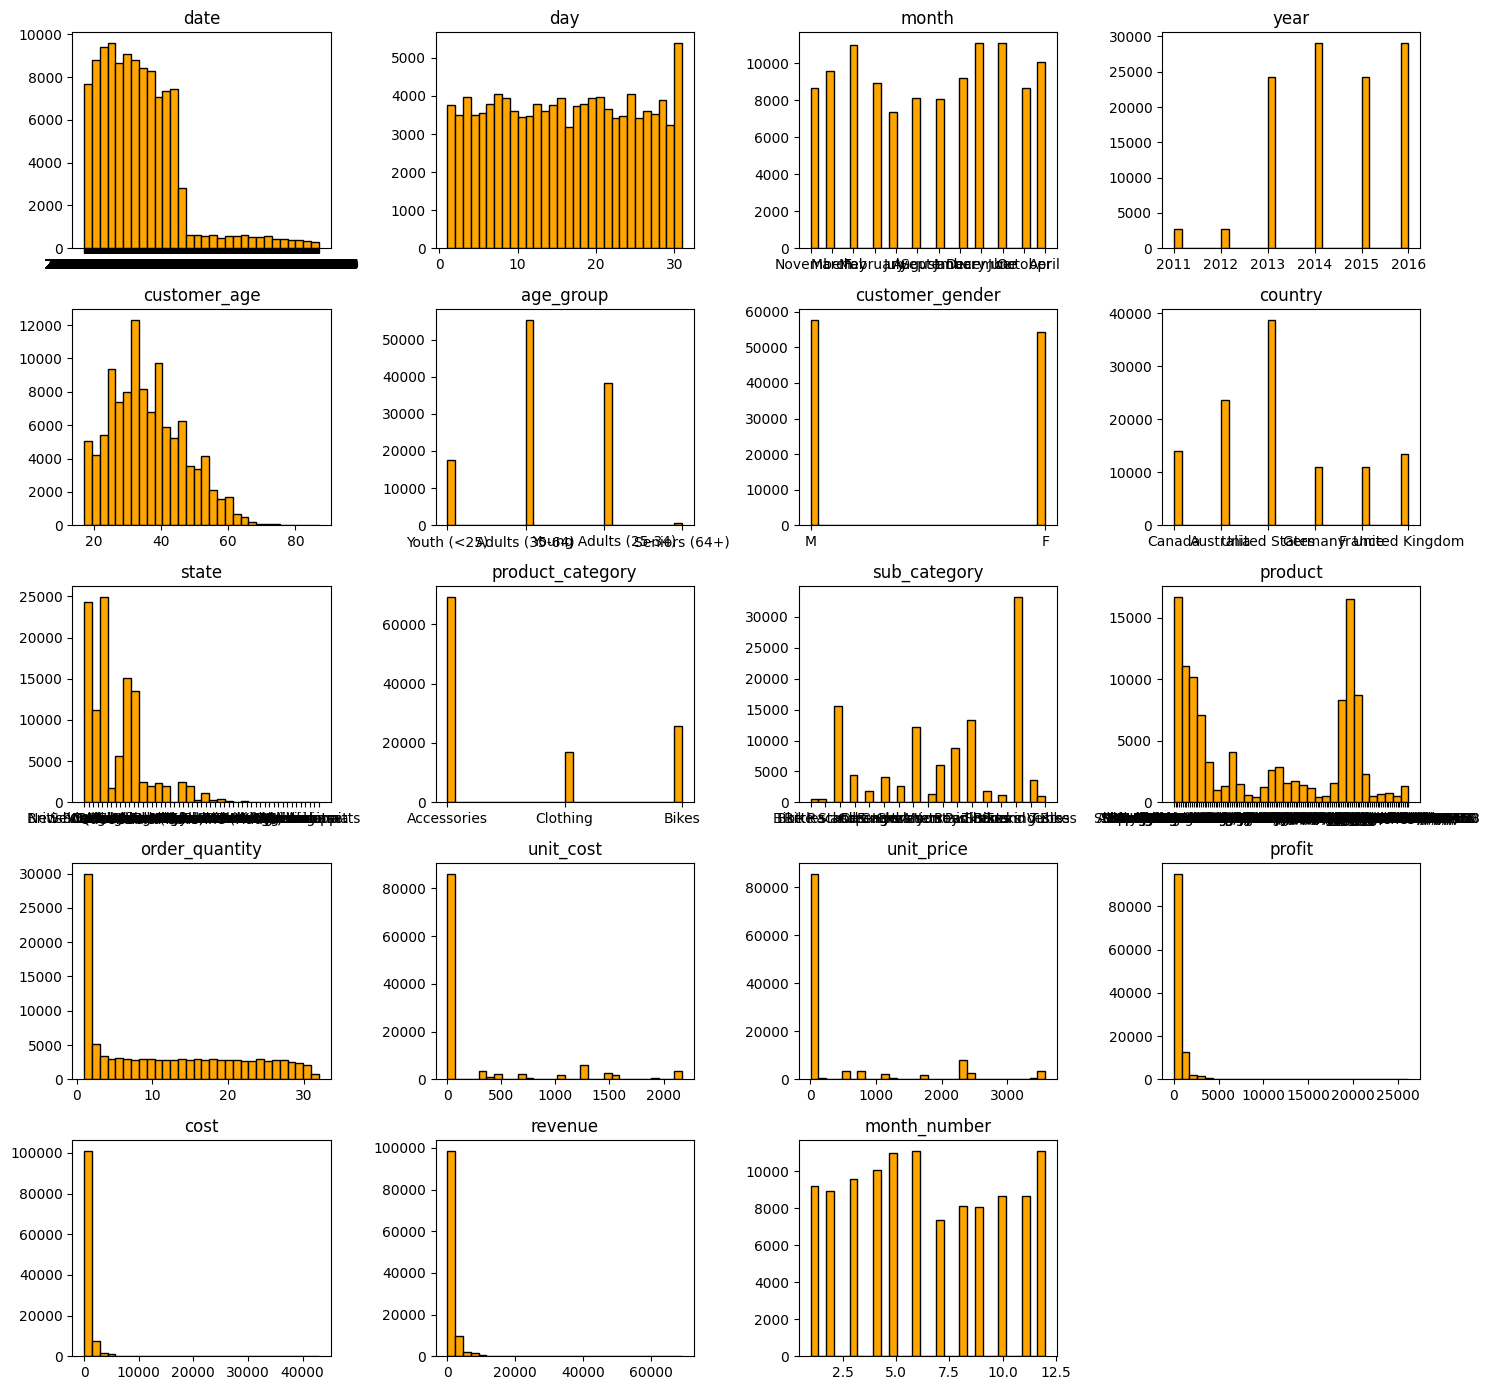

In [ ]:
# grid size
nrows, ncols = 5, 4  # adjust for your number of features

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 14))

axes = axes.flatten()

# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(df.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(df.iloc[:, i], bins=30, color='orange', edgecolor='black')
    ax.set_title(df.columns[i])

plt.tight_layout()
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112036 entries, 0 to 113035
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   date              112036 non-null  object
 1   day               112036 non-null  int64 
 2   month             112036 non-null  object
 3   year              112036 non-null  int64 
 4   customer_age      112036 non-null  int64 
 5   age_group         112036 non-null  object
 6   customer_gender   112036 non-null  object
 7   country           112036 non-null  object
 8   state             112036 non-null  object
 9   product_category  112036 non-null  object
 10  sub_category      112036 non-null  object
 11  product           112036 non-null  object
 12  order_quantity    112036 non-null  int64 
 13  unit_cost         112036 non-null  int64 
 14  unit_price        112036 non-null  int64 
 15  profit            112036 non-null  int64 
 16  cost              112036 non-null  int64 
 

## Outliers

Checking for potential outliers in our numerical columns.

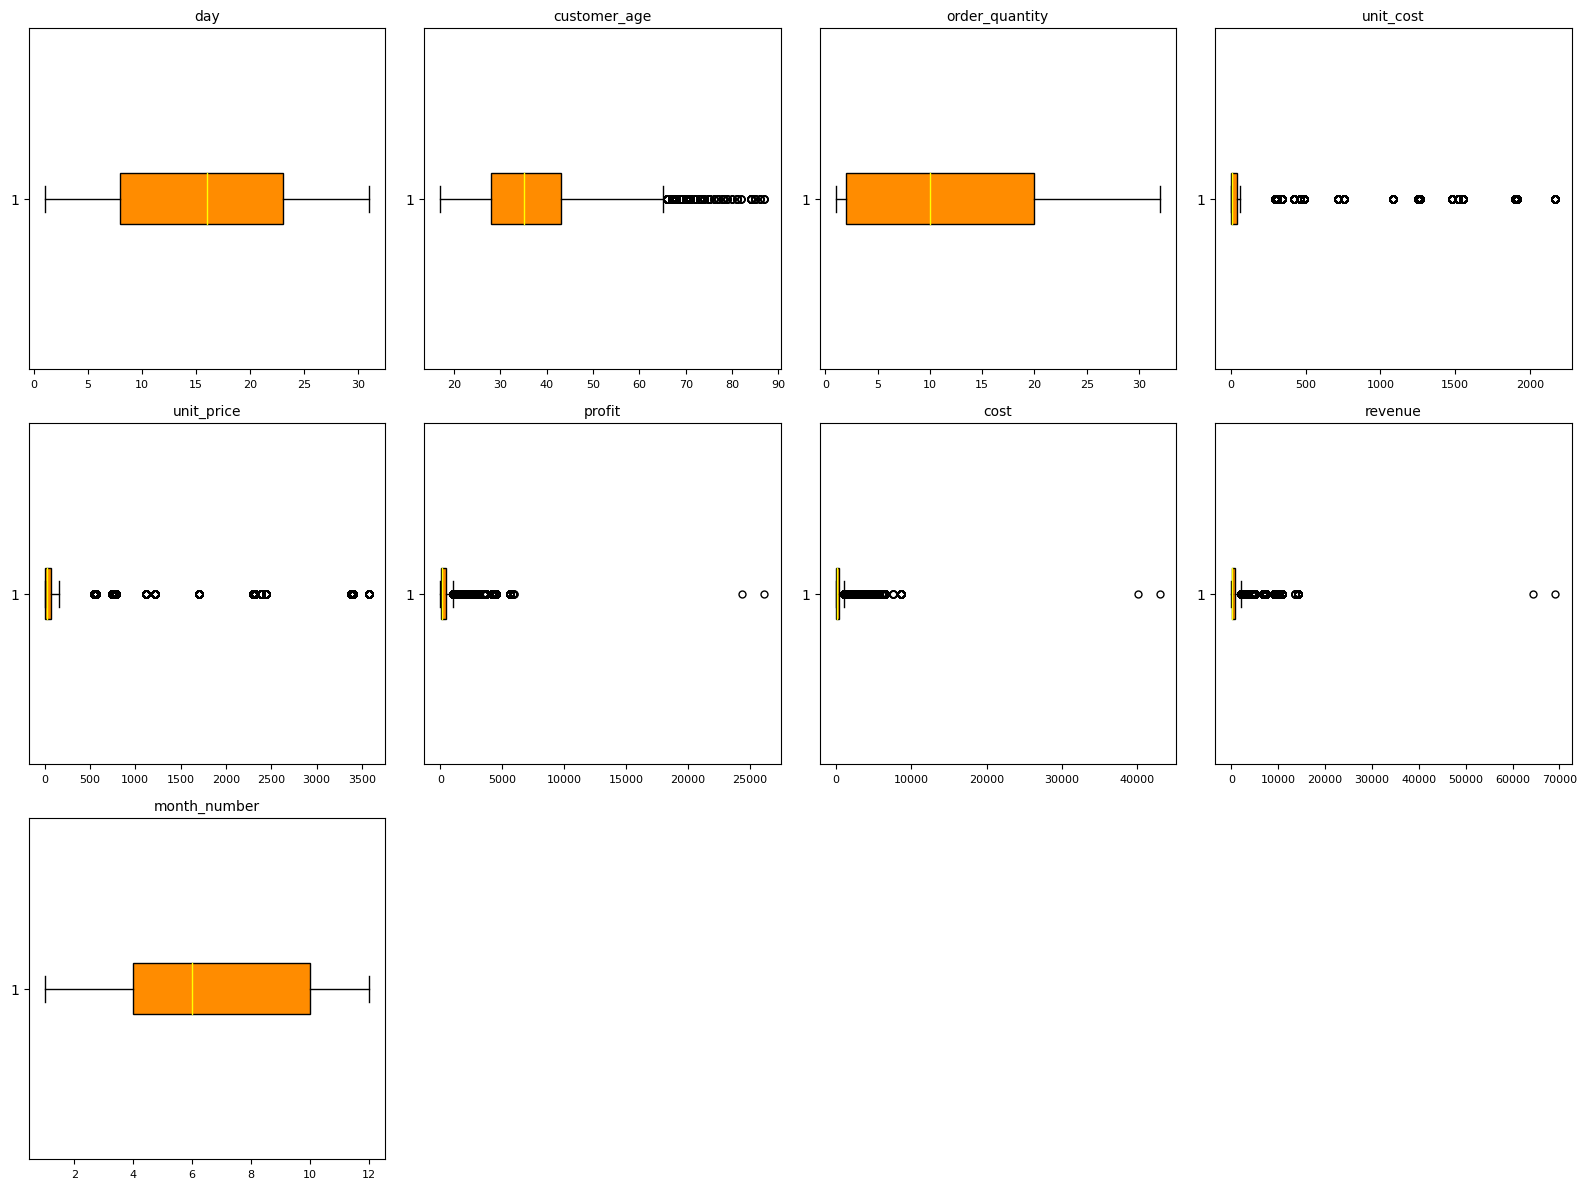

In [ ]:
# Color for the box plots
color = '#FF8C00'

# Columns to plot
columns_to_plot = ['day', 'customer_age', 'order_quantity', 'unit_cost', 'unit_price', 'profit', 'cost', 'revenue', 'month_number']

# Determine grid size based on the number of columns to plot
nrows = (len(columns_to_plot) + 3) // 4  # 4 columns per row, round up
ncols = 4

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, nrows * 4))
axes = axes.flatten()

for i, col in enumerate(columns_to_plot):
    ax = axes[i]
    ax.boxplot(df[col].dropna(), vert=False, patch_artist=True,
               boxprops=dict(facecolor=color, color='black'),
               medianprops=dict(color='yellow'), whiskerprops=dict(color='black'),
               capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(col, fontsize=10)
    ax.tick_params(axis='x', labelsize=8)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

## Data Groups

Ploting some of the columns by group for better visualization:

We can group data in 5 main clusters to explore:

In [ ]:
# Grouping columns into categories
date_columns = ['date', 'day', 'month', 'year']
customer_columns = ['customer_age', 'age_group', 'customer_gender']
location_columns = ['country', 'state']
product_columns = ['product_category', 'sub_category', 'product']
sales_columns = ['order_quantity', 'unit_cost', 'unit_price', 'profit', 'cost', 'revenue']

### Date Columns

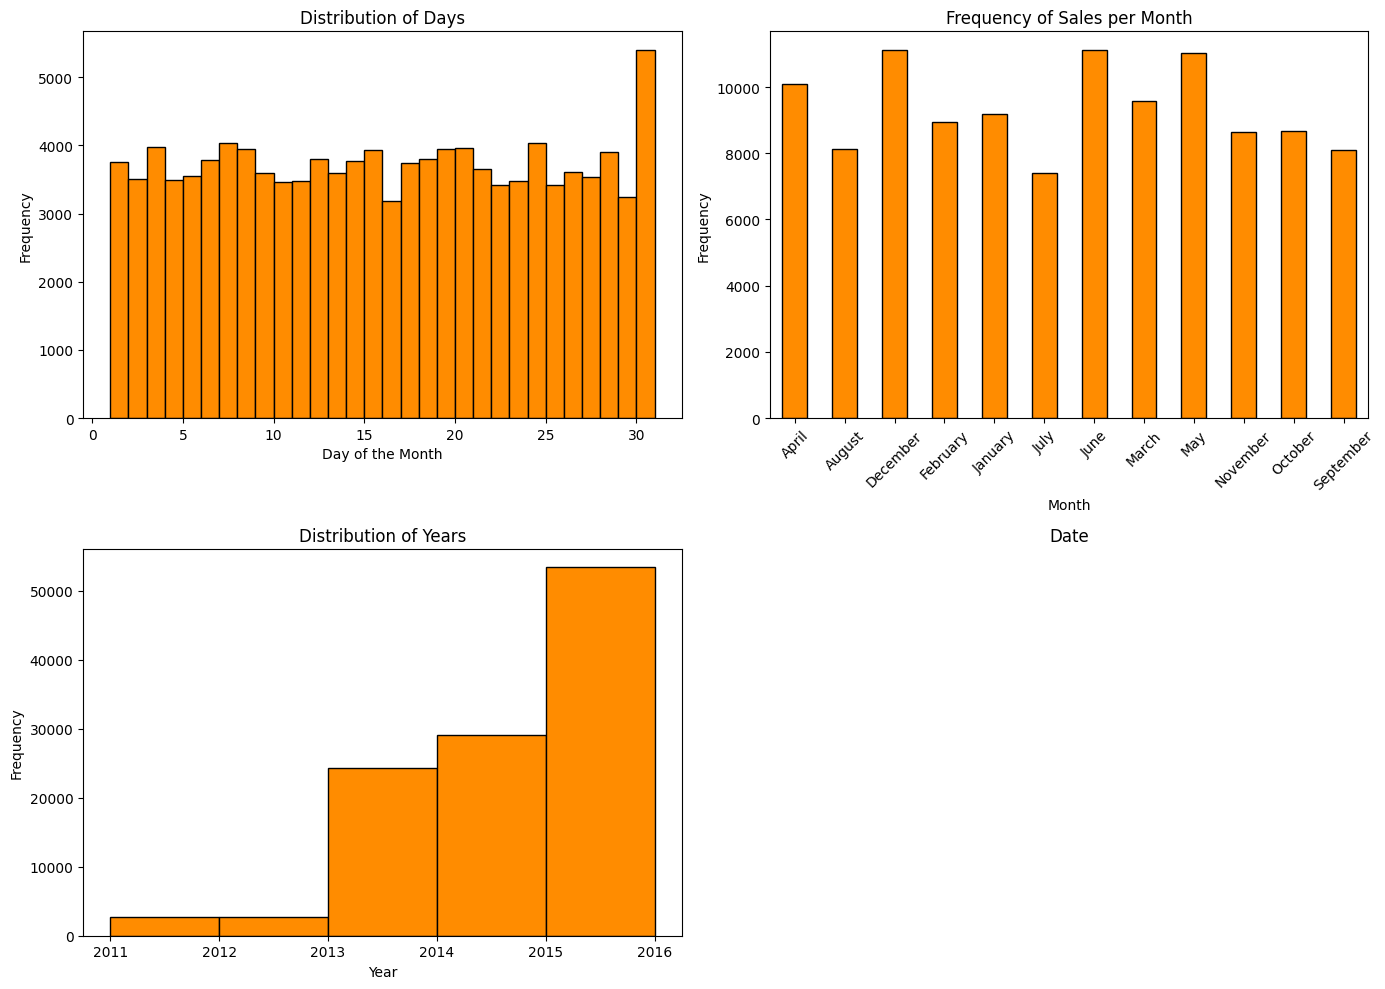

In [ ]:
# Create a 2x2 grid of plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
axes = axes.flatten()  # Flatten the 2x2 array to easily index

# Histogram for 'day'
axes[0].hist(df['day'].dropna(), bins=range(1, 32), color='#FF8C00', edgecolor='black')
axes[0].set_title('Distribution of Days', fontsize=12)
axes[0].set_xlabel('Day of the Month', fontsize=10)
axes[0].set_ylabel('Frequency', fontsize=10)

# Bar plot for 'month'
df['month'].value_counts().sort_index().plot(kind='bar', color='#FF8C00', edgecolor='black', ax=axes[1])
axes[1].set_title('Frequency of Sales per Month', fontsize=12)
axes[1].set_xlabel('Month', fontsize=10)
axes[1].set_ylabel('Frequency', fontsize=10)
axes[1].tick_params(axis='x', rotation=45)

# Histogram for 'year'
axes[2].hist(df['year'].dropna(), bins=range(df['year'].min(), df['year'].max() + 1), color='#FF8C00', edgecolor='black')
axes[2].set_title('Distribution of Years', fontsize=12)
axes[2].set_xlabel('Year', fontsize=10)
axes[2].set_ylabel('Frequency', fontsize=10)

# Empty plot for 'date' (as it’s typically a datetime object, not a categorical or simple numeric column)
axes[3].axis('off')  # Hide the 4th subplot
axes[3].set_title('Date', fontsize=12)

plt.tight_layout()
plt.show()

### Customer Columns

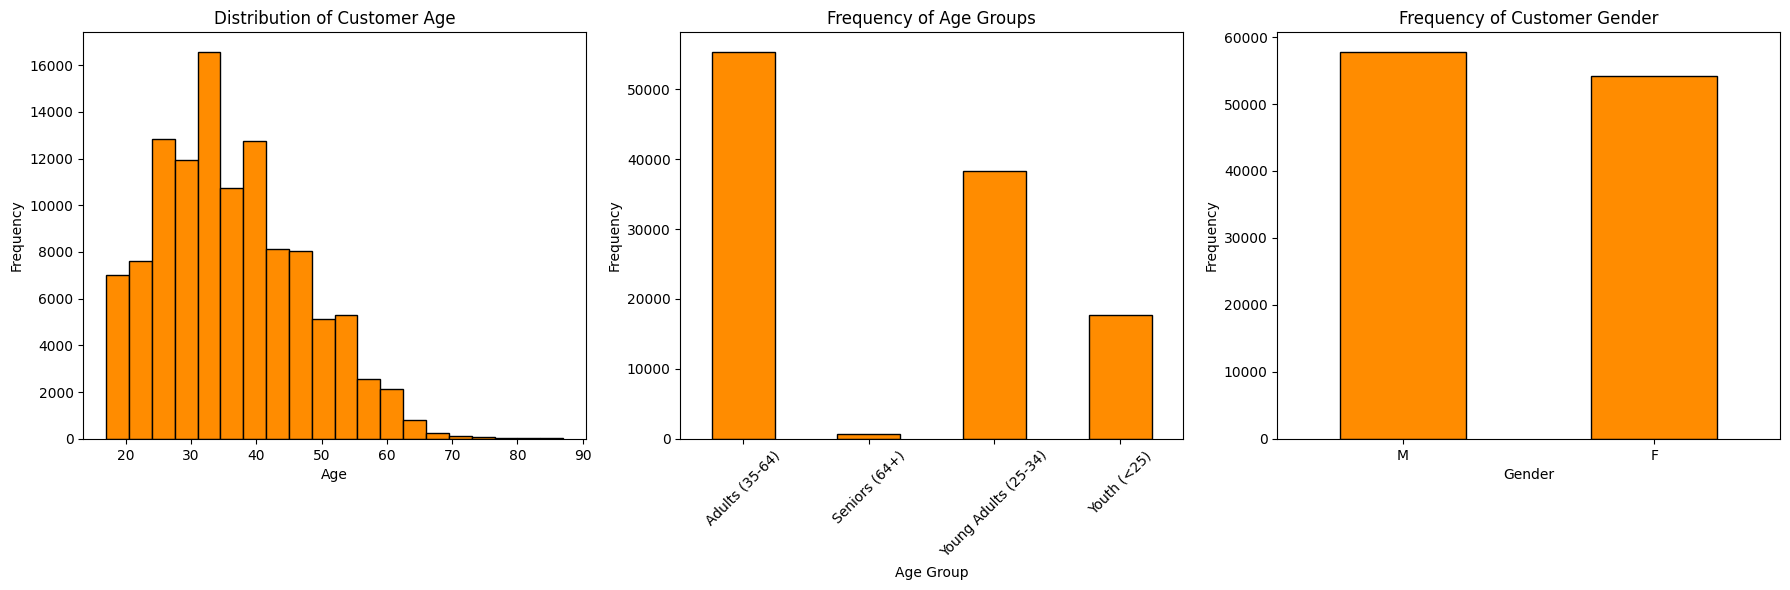

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
axes = axes.flatten()  # Flatten the 1x3 array to easily index

# Histogram for 'customer_age'
axes[0].hist(df['customer_age'].dropna(), bins=20, color='#FF8C00', edgecolor='black')
axes[0].set_title('Distribution of Customer Age', fontsize=12)
axes[0].set_xlabel('Age', fontsize=10)
axes[0].set_ylabel('Frequency', fontsize=10)

# Bar plot for 'age_group'
df['age_group'].value_counts().sort_index().plot(kind='bar', color='#FF8C00', edgecolor='black', ax=axes[1])
axes[1].set_title('Frequency of Age Groups', fontsize=12)
axes[1].set_xlabel('Age Group', fontsize=10)
axes[1].set_ylabel('Frequency', fontsize=10)
axes[1].tick_params(axis='x', rotation=45)

# Bar plot for 'customer_gender'
df['customer_gender'].value_counts().plot(kind='bar', color='#FF8C00', edgecolor='black', ax=axes[2])
axes[2].set_title('Frequency of Customer Gender', fontsize=12)
axes[2].set_xlabel('Gender', fontsize=10)
axes[2].set_ylabel('Frequency', fontsize=10)
axes[2].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

### Product Columns

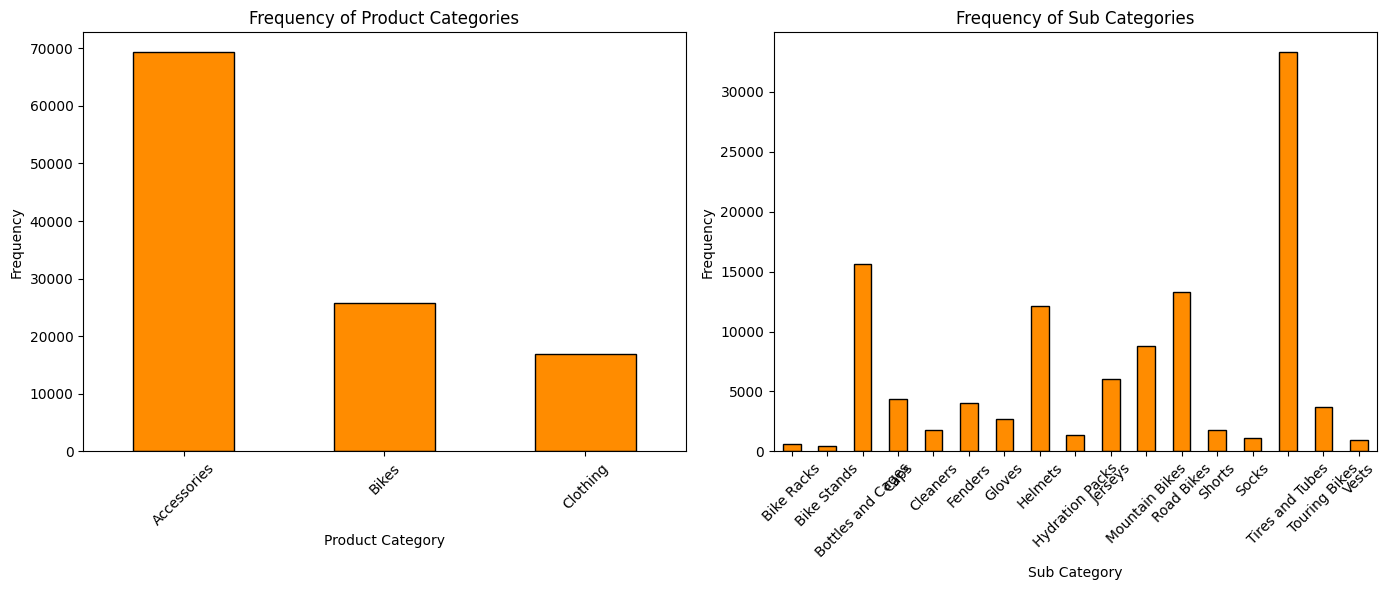

In [ ]:
product_columns = ['product_category', 'sub_category']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
axes = axes.flatten()  # Flatten the 1x2 array to easily index

# Bar plot for 'product_category'
df['product_category'].value_counts().sort_index().plot(kind='bar', color='#FF8C00', edgecolor='black', ax=axes[0])
axes[0].set_title('Frequency of Product Categories', fontsize=12)
axes[0].set_xlabel('Product Category', fontsize=10)
axes[0].set_ylabel('Frequency', fontsize=10)
axes[0].tick_params(axis='x', rotation=45)

# Bar plot for 'sub_category'
df['sub_category'].value_counts().sort_index().plot(kind='bar', color='#FF8C00', edgecolor='black', ax=axes[1])
axes[1].set_title('Frequency of Sub Categories', fontsize=12)
axes[1].set_xlabel('Sub Category', fontsize=10)
axes[1].set_ylabel('Frequency', fontsize=10)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Sales Columns

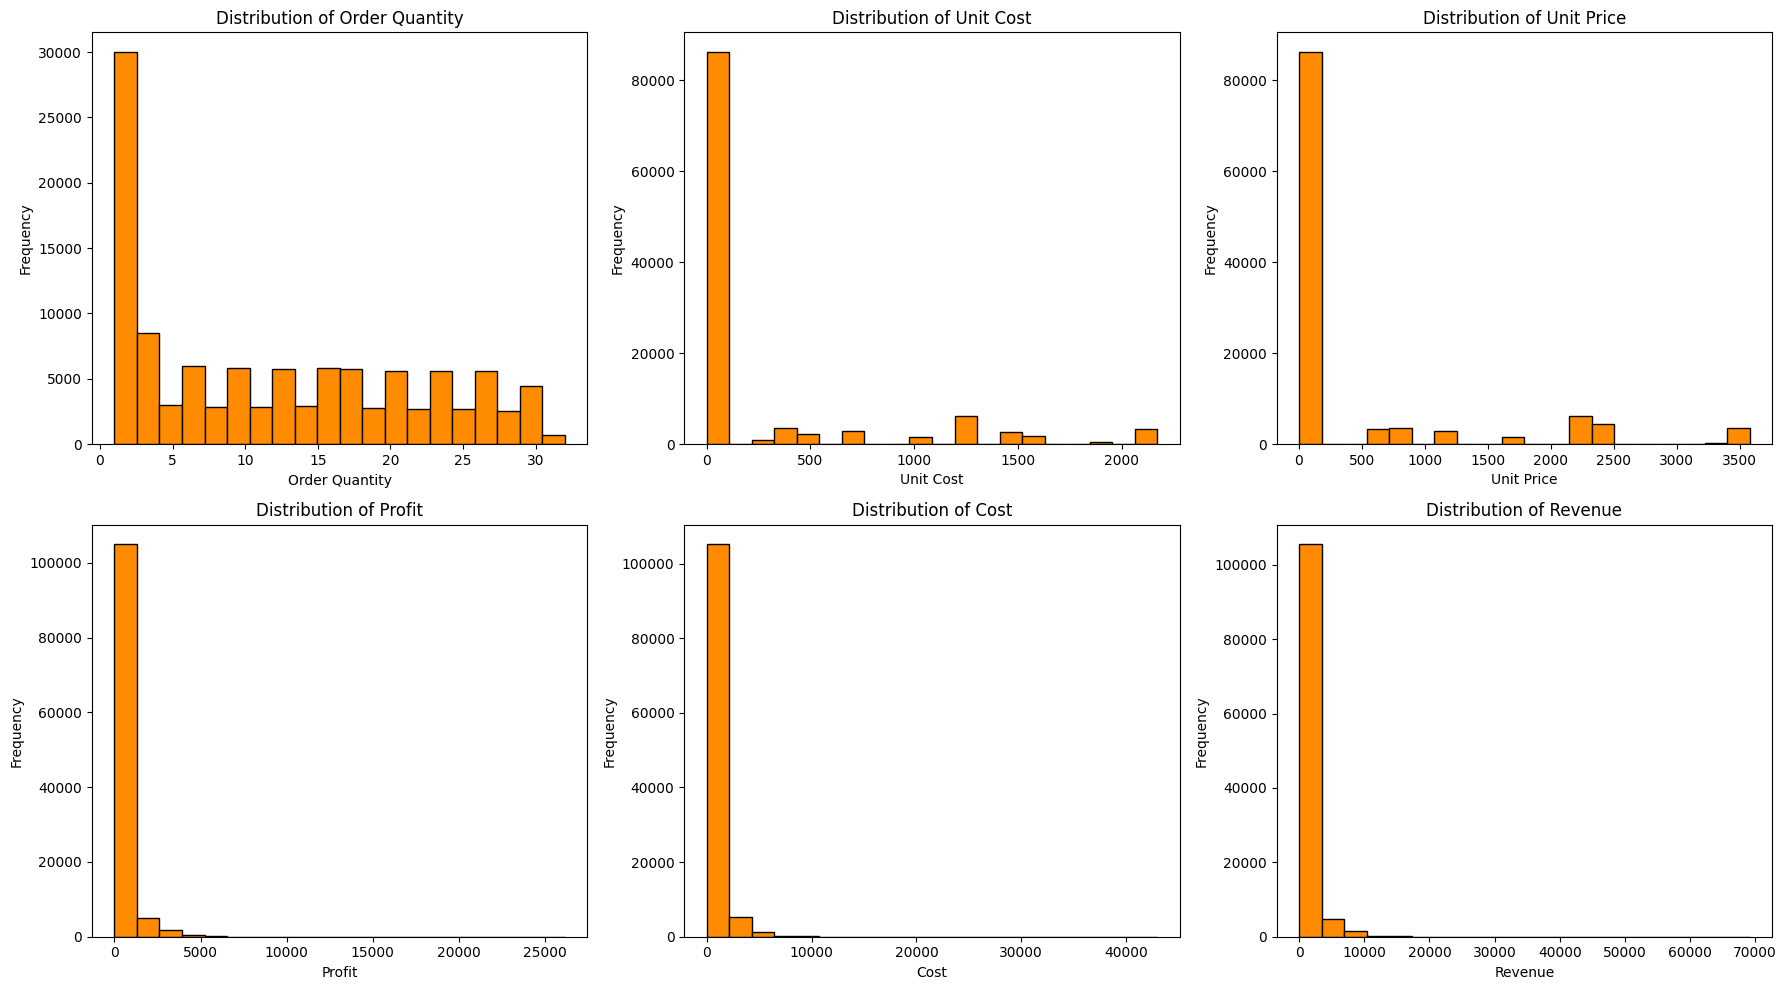

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()  # Flatten the 2x3 array to easily index

# Histogram for 'order_quantity'
axes[0].hist(df['order_quantity'].dropna(), bins=20, color='#FF8C00', edgecolor='black')
axes[0].set_title('Distribution of Order Quantity', fontsize=12)
axes[0].set_xlabel('Order Quantity', fontsize=10)
axes[0].set_ylabel('Frequency', fontsize=10)

# Histogram for 'unit_cost'
axes[1].hist(df['unit_cost'].dropna(), bins=20, color='#FF8C00', edgecolor='black')
axes[1].set_title('Distribution of Unit Cost', fontsize=12)
axes[1].set_xlabel('Unit Cost', fontsize=10)
axes[1].set_ylabel('Frequency', fontsize=10)

# Histogram for 'unit_price'
axes[2].hist(df['unit_price'].dropna(), bins=20, color='#FF8C00', edgecolor='black')
axes[2].set_title('Distribution of Unit Price', fontsize=12)
axes[2].set_xlabel('Unit Price', fontsize=10)
axes[2].set_ylabel('Frequency', fontsize=10)

# Histogram for 'profit'
axes[3].hist(df['profit'].dropna(), bins=20, color='#FF8C00', edgecolor='black')
axes[3].set_title('Distribution of Profit', fontsize=12)
axes[3].set_xlabel('Profit', fontsize=10)
axes[3].set_ylabel('Frequency', fontsize=10)

# Histogram for 'cost'
axes[4].hist(df['cost'].dropna(), bins=20, color='#FF8C00', edgecolor='black')
axes[4].set_title('Distribution of Cost', fontsize=12)
axes[4].set_xlabel('Cost', fontsize=10)
axes[4].set_ylabel('Frequency', fontsize=10)

# Histogram for 'revenue'
axes[5].hist(df['revenue'].dropna(), bins=20, color='#FF8C00', edgecolor='black')
axes[5].set_title('Distribution of Revenue', fontsize=12)
axes[5].set_xlabel('Revenue', fontsize=10)
axes[5].set_ylabel('Frequency', fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
df.head(5)

,date,day,month,year,customer_age,age_group,customer_gender,country,state,product_category,sub_category,product,order_quantity,unit_cost,unit_price,profit,cost,revenue,month_number
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,600,360,960,11
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,600,360,960,11
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1725,1035,2760,3
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1500,900,2400,3
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,300,180,480,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112036 entries, 0 to 113035
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   date              112036 non-null  object
 1   day               112036 non-null  int64 
 2   month             112036 non-null  object
 3   year              112036 non-null  int64 
 4   customer_age      112036 non-null  int64 
 5   age_group         112036 non-null  object
 6   customer_gender   112036 non-null  object
 7   country           112036 non-null  object
 8   state             112036 non-null  object
 9   product_category  112036 non-null  object
 10  sub_category      112036 non-null  object
 11  product           112036 non-null  object
 12  order_quantity    112036 non-null  int64 
 13  unit_cost         112036 non-null  int64 
 14  unit_price        112036 non-null  int64 
 15  profit            112036 non-null  int64 
 16  cost              112036 non-null  int64 
 

# 05 | Looking for Correlations

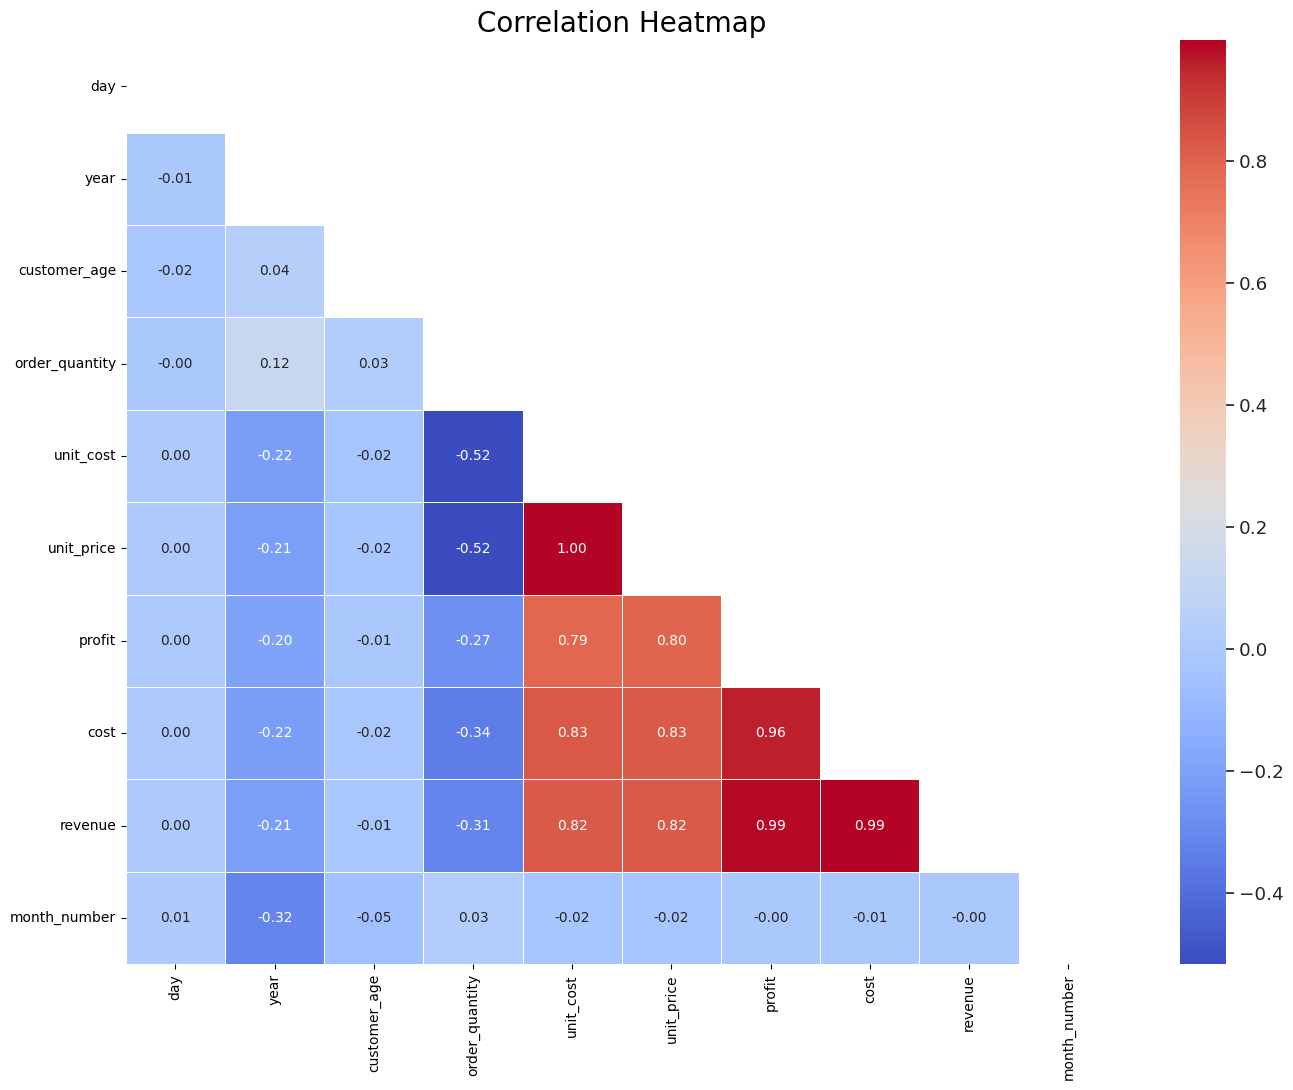

In [ ]:
# Selecting numerical columns
numerical_columns = ['day', 'year', 'customer_age', 'order_quantity', 'unit_cost', 'unit_price', 'profit', 'cost', 'revenue', 'month_number']
df_numerical = df[numerical_columns]

# Compute the correlation matrix
num_corr = df_numerical.corr()

# Create a mask to hide the upper triangle for aesthetics
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True

# Create the heatmap
f, ax = plt.subplots(figsize=(16, 12))
sns.set(font_scale=1.2)  # Increase font size
ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 10}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax)
ax.set_title("Correlation Heatmap", fontsize=20)  # Add title
plt.show()

**Conclusions:** The heatmap with the numerical columns is not very relevant, as the higher the number of units or the higher the values, the more revenue is generated. This correlation is expected and makes sense, so there are no major insights to be gained from this analysis.


In [ ]:
df.head(3)

,date,day,month,year,customer_age,age_group,customer_gender,country,state,product_category,sub_category,product,order_quantity,unit_cost,unit_price,profit,cost,revenue,month_number
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,600,360,960,11
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,600,360,960,11
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1725,1035,2760,3


# 05 | App Creation

Available filters in the App to pull results:

- `Year`
- `Month`
- `Product Category`
- `Sub-Category`
- `Country`
- `State`

## Sales Report

Building the key functions to pull sales reporting data in the App:

In [ ]:
df.head()

,date,day,month,year,customer_age,age_group,customer_gender,country,state,product_category,sub_category,product,order_quantity,unit_cost,unit_price,profit,cost,revenue,month_number
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,600,360,960,11
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,600,360,960,11
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1725,1035,2760,3
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1500,900,2400,3
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,300,180,480,5


### Summary Statistics

In [ ]:
# Function to pulls the sales key metrics summary:

def sales_key_metrics(df, year=None, month=None):
    """
    Function to pull the sales key metrics summary based on the given filters.
    """
    if year is not None:
        df = df[df['year'] == year]
    if month is not None:
        df = df[df['month'] == month]

    # Calculate key metrics
    total_revenue = df['revenue'].sum()
    total_cost = df['cost'].sum()
    total_profit = df['profit'].sum()
    total_order_quantity = df.groupby('product_category')['order_quantity'].sum()

    # Print summary statistics
    print("Summary Statistics:")
    print(f'--------------------------------')
    print(f"Total Revenue: {total_revenue:,.2f}€")
    print(f'--------------------------------')
    print(f"Total Cost: {total_cost:,.2f}€")
    print(f'--------------------------------')
    print(f"Total Profit: {total_profit:,.2f}€")
    print(f'--------------------------------')

    print("\nTotal Order Quantity by Product Category:")
    print(f'--------------------------------')
    print(total_order_quantity)

In [ ]:
sales_key_metrics(df, 2015)

Summary Statistics:
--------------------------------
Total Revenue: 22,318,354.00€
--------------------------------
Total Cost: 12,448,342.00€
--------------------------------
Total Profit: 9,870,012.00€
--------------------------------

Total Order Quantity by Product Category:
--------------------------------
product_category
Accessories    222278
Bikes            8520
Clothing        56099
Name: order_quantity, dtype: int64


### Sales Viz

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112036 entries, 0 to 113035
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   date              112036 non-null  object
 1   day               112036 non-null  int64 
 2   month             112036 non-null  object
 3   year              112036 non-null  int64 
 4   customer_age      112036 non-null  int64 
 5   age_group         112036 non-null  object
 6   customer_gender   112036 non-null  object
 7   country           112036 non-null  object
 8   state             112036 non-null  object
 9   product_category  112036 non-null  object
 10  sub_category      112036 non-null  object
 11  product           112036 non-null  object
 12  order_quantity    112036 non-null  int64 
 13  unit_cost         112036 non-null  int64 
 14  unit_price        112036 non-null  int64 
 15  profit            112036 non-null  int64 
 16  cost              112036 non-null  int64 
 

1) Seasonal trends: `revenue` distribution over the year.

In [ ]:
def sales_month_trend(df, year=None):

  """Plots revenue over month to see seasonal trends"""

  # Filter the year if given:
  if year is not None:
    df = df[df.year == year]

  # Group data month and calculate total revenue by month:
  monthly_revenue = df.groupby('month_number')['revenue'].sum().reset_index()

  #Plotting the results:
  plt.figure(figsize=(10, 6))
  plt.bar(monthly_revenue['month_number'], monthly_revenue['revenue'], color='orange')
  plt.title(f'Sales Trend {"for Year " + str(year) if year else "Overall"}')
  plt.xlabel('Month')
  plt.ylabel('Revenue')
  plt.xticks(ticks=range(1, 13))
  plt.grid(axis='y')
  plt.show()

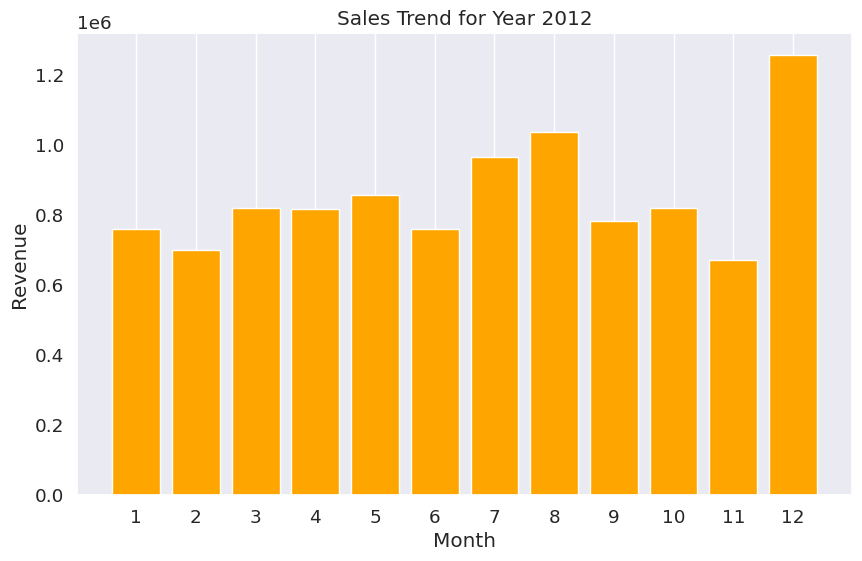

In [ ]:
sales_month_trend(df, 2012)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112036 entries, 0 to 113035
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   date              112036 non-null  object
 1   day               112036 non-null  int64 
 2   month             112036 non-null  object
 3   year              112036 non-null  int64 
 4   customer_age      112036 non-null  int64 
 5   age_group         112036 non-null  object
 6   customer_gender   112036 non-null  object
 7   country           112036 non-null  object
 8   state             112036 non-null  object
 9   product_category  112036 non-null  object
 10  sub_category      112036 non-null  object
 11  product           112036 non-null  object
 12  order_quantity    112036 non-null  int64 
 13  unit_cost         112036 non-null  int64 
 14  unit_price        112036 non-null  int64 
 15  profit            112036 non-null  int64 
 16  cost              112036 non-null  int64 
 

2) `Profit` by `product category` to see most profitable product type:

In [ ]:
def profit_product_category(df, year=None):

    """Plots profit by product category"""

    # Filter the dataframe for the given year if provided
    if year is not None:
        df = df[df['year'] == year]

    # Group the data by product category and calculate the total profit for each category
    category_profit = df.groupby('product_category')['profit'].sum().reset_index()

    # Plotting the pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(category_profit['profit'], labels=category_profit['product_category'], autopct='%1.1f%%', startangle=140)
    plt.title(f'Profit by Product Category {"for Year " + str(year) if year else "Overall"}')
    plt.axis('equal')
    plt.show()

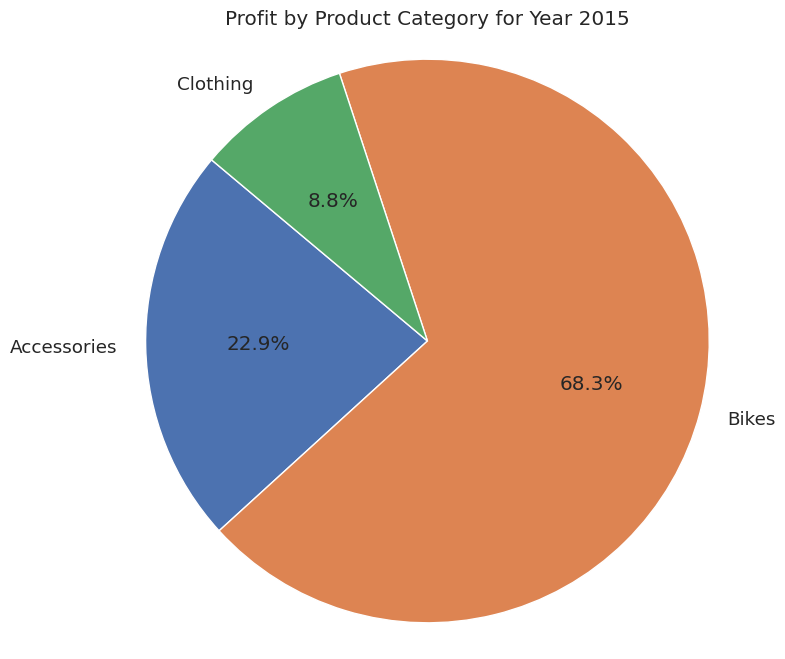

In [ ]:
profit_product_category(df,2015)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112036 entries, 0 to 113035
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   date              112036 non-null  object
 1   day               112036 non-null  int64 
 2   month             112036 non-null  object
 3   year              112036 non-null  int64 
 4   customer_age      112036 non-null  int64 
 5   age_group         112036 non-null  object
 6   customer_gender   112036 non-null  object
 7   country           112036 non-null  object
 8   state             112036 non-null  object
 9   product_category  112036 non-null  object
 10  sub_category      112036 non-null  object
 11  product           112036 non-null  object
 12  order_quantity    112036 non-null  int64 
 13  unit_cost         112036 non-null  int64 
 14  unit_price        112036 non-null  int64 
 15  profit            112036 non-null  int64 
 16  cost              112036 non-null  int64 
 

3) `Revenue` by `country`:

In [ ]:
def revenue_per_country(df, year=None):
    """Plots revenue per country, with an optional filter for a specific year."""

    # Filter the year if provided
    if year is not None:
        df = df[df['year'] == year]

    # Group data by country and calculate total revenue by country
    country_revenue = df.groupby('country')['revenue'].sum().reset_index()

    # Plotting the results
    plt.figure(figsize=(10, 8))
    plt.bar(country_revenue['country'], country_revenue['revenue'], color='orange')
    plt.title(f'Revenue by Country {"for Year " + str(year) if year else "Overall"}')
    plt.xlabel('Country')
    plt.ylabel('Revenue')
    plt.xticks(rotation=45, ha='right')  # Rotate country names for better readability
    plt.grid(axis='y')
    plt.tight_layout()  # Adjust layout to make room for rotated x-axis labels
    plt.show()

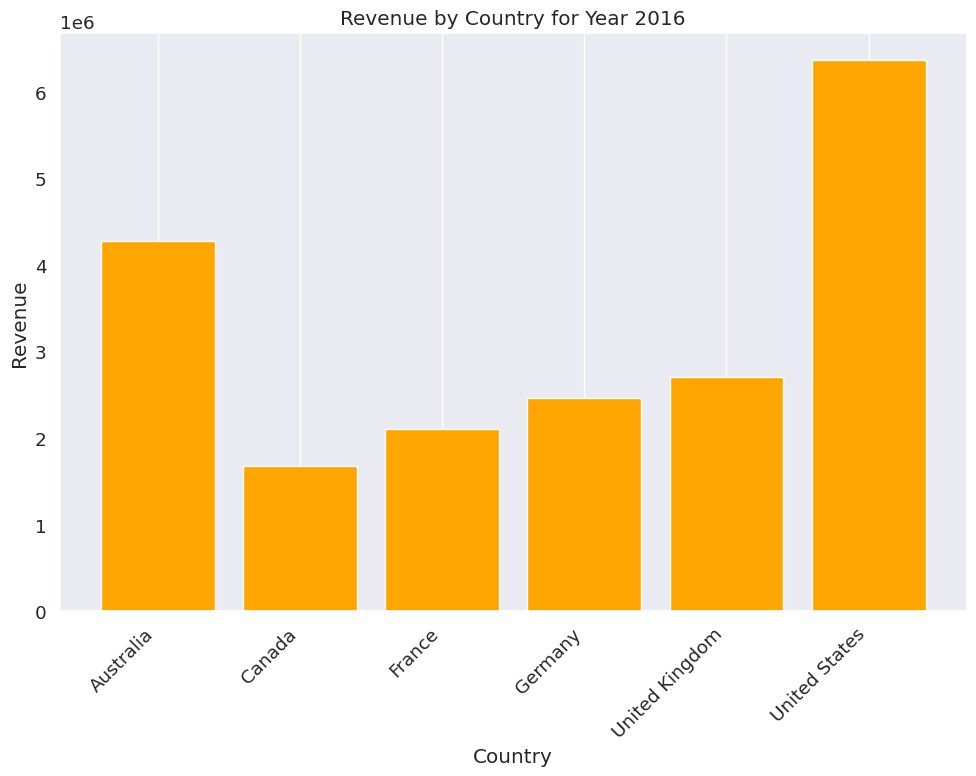

In [ ]:
revenue_per_country(df, 2016)

## Product Cost/Price


We'll create a product catalog containing `unit_cost` & `unit_price` for employees to quickly check product prices in the App, based on the latest data so 2016 data.

In [ ]:
# Creating 2016 Dataset:
df_2016 = df[df.year == 2016]

In [ ]:
df_2016.shape

(29128, 19)

In [ ]:
df_2016.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29128 entries, 3 to 113035
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   date              29128 non-null  object
 1   day               29128 non-null  int64 
 2   month             29128 non-null  object
 3   year              29128 non-null  int64 
 4   customer_age      29128 non-null  int64 
 5   age_group         29128 non-null  object
 6   customer_gender   29128 non-null  object
 7   country           29128 non-null  object
 8   state             29128 non-null  object
 9   product_category  29128 non-null  object
 10  sub_category      29128 non-null  object
 11  product           29128 non-null  object
 12  order_quantity    29128 non-null  int64 
 13  unit_cost         29128 non-null  int64 
 14  unit_price        29128 non-null  int64 
 15  profit            29128 non-null  int64 
 16  cost              29128 non-null  int64 
 17  revenue         

In [ ]:
# Checking number of products in 2016 data:
df_2016.sub_category.nunique()

17

In [ ]:
df_2016['product'].nunique()

130

**Conclusion:**

*   3 Categories
*   17 Sub_categories
*   130 Products



In [ ]:
# List of products:
df_2016['product'].value_counts()

,count
product,
Water Bottle - 30 oz.,3091
Patch Kit/8 Patches,2939
Mountain Tire Tube,1926
AWC Logo Cap,1295
"Sport-100 Helmet, Red",1191
...,...
"Mountain-100 Silver, 42",9
"Mountain-100 Black, 42",9
"Road-650 Red, 52",7


In [ ]:
def product_unit_cost_price(df, product):

    """Pulls unit cost and price of a given product"""

    filtered_df = df[df['product'] == product]

    if not filtered_df.empty:
        unit_cost = filtered_df['unit_cost'].unique()[0]
        unit_price = filtered_df['unit_price'].unique()[0]
        print('Results of the selected product:')
        print(f'--------------------------------')
        print(f"Unit Cost: {unit_cost}")
        print(f'--------------------------------')
        print(f"Unit Price: {unit_price}")
        print(f'--------------------------------')
    else:
        print("No matching product found, review the product name")

In [ ]:
# Testing function:
product = "Women's Mountain Shorts, S"
product_unit_cost_price(df_2016, product)

Results of the selected product:
--------------------------------
Unit Cost: 26
--------------------------------
Unit Price: 70
--------------------------------


In [ ]:
df.head()

,date,day,month,year,customer_age,age_group,customer_gender,country,state,product_category,sub_category,product,order_quantity,unit_cost,unit_price,profit,cost,revenue,month_number
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,600,360,960,11
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,600,360,960,11
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1725,1035,2760,3
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1500,900,2400,3
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,300,180,480,5


Downloading 2016 Data to bring to App:

In [ ]:
#df_2016.to_csv('2016_cleaned_data.csv', index=False)
#files.download('2016_cleaned_data.csv')